# Naive Bayes on Donors Choose

In [476]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math


## Introduction



DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Currently, a large number of volunteers are needed to manually screen each submission before it can be approved and posted on the DonorsChoose.org website.

However, next year, DonorsChoose.org expects to receive close to 500,000 project proposals. Consequently, they face three main challenges:

    1.Scaling current manual processes and resources to screen 500,000 projects as quickly and efficiently as possible.

    2.Increasing the consistency of project vetting across different volunteers to improve the experience for teachers.

    3.Focusing volunteer time on the applications that need the most assistance.

The objective of the project is to predict whether a DonorsChoose.org project proposal submitted by a teacher will be approved or not. This will be achieved by analyzing the text of project descriptions and other metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects that require further review before approval.

#### Model built by Alfred Ndlovu

In [389]:
# Load data

project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [390]:
# View the first five rows

project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [392]:
# Check for general information of each feature

project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [393]:
# Summary statistics

project_data.describe()

,Unnamed: 0,teacher_number_of_previously_posted_projects,project_is_approved
count,109248.000000,109248.000000,109248.000000
mean,91183.786568,11.153165,0.848583
std,52548.095272,27.777154,0.358456
min,0.000000,0.000000,0.000000
25%,45743.500000,0.000000,1.000000
50%,91253.500000,2.000000,1.000000
75%,136712.500000,9.000000,1.000000
max,182079.000000,451.000000,1.000000


## Handle Missing Data

In [394]:
# Check for missing data points throughout the data

project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

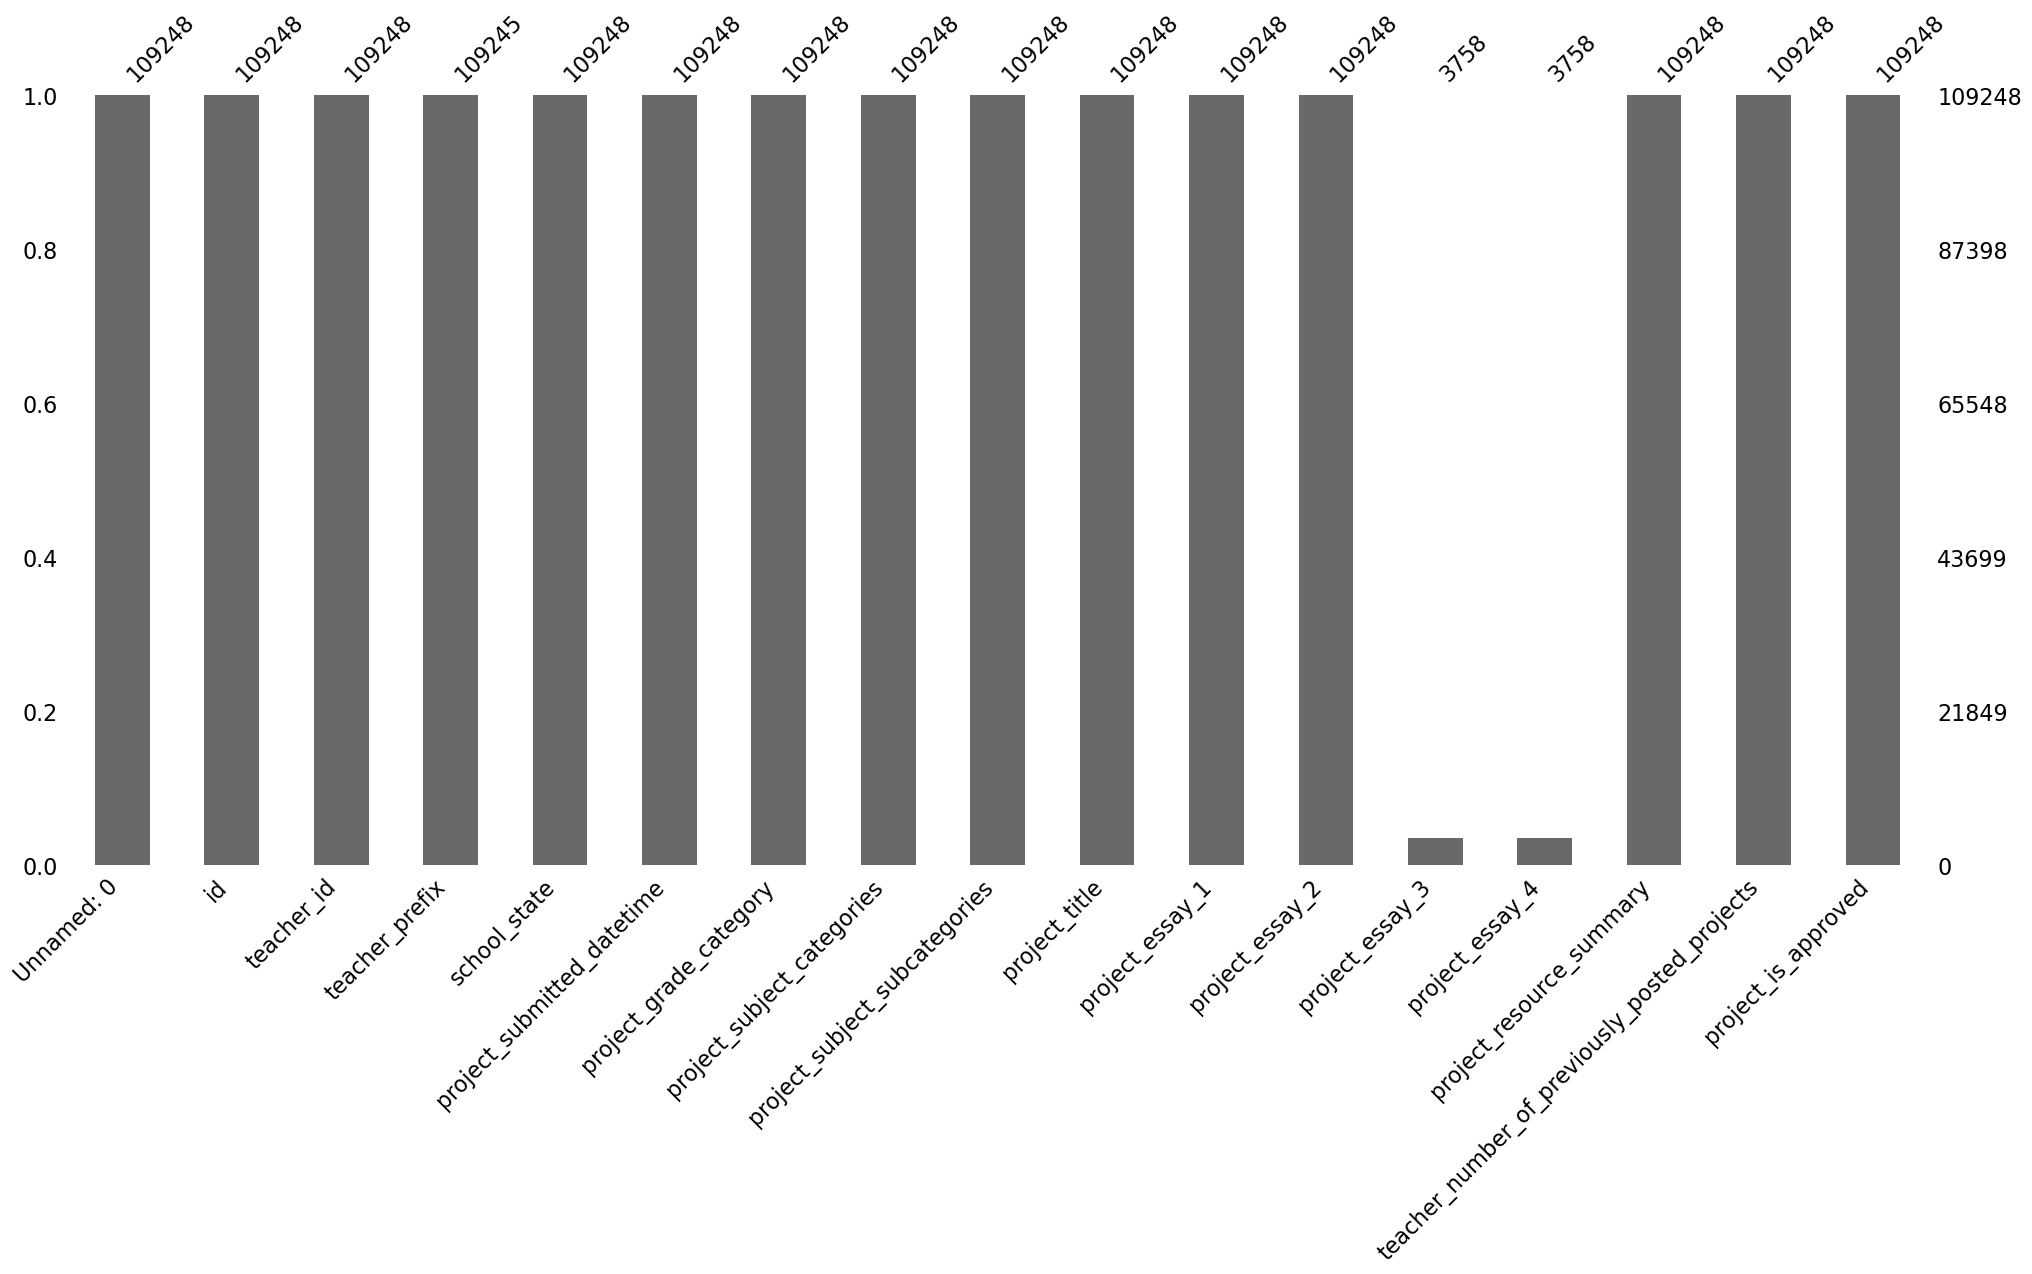

In [395]:
# Visualise missing values

msno.bar(project_data);

## Treat missing values in teacher_id

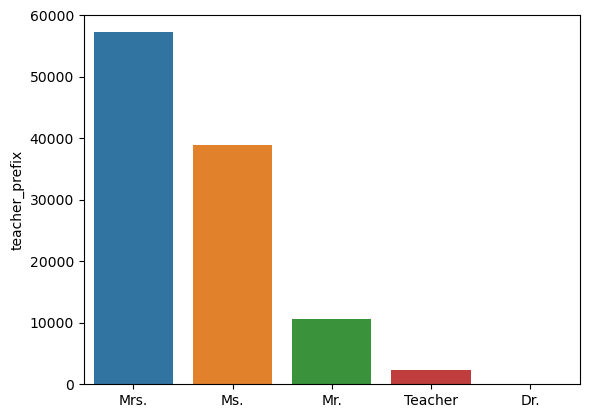

In [396]:
# Visualise the teacher_id
sns.barplot(x=project_data.teacher_prefix.value_counts().index,y= project_data.teacher_prefix.value_counts());

In [397]:
project_data.dropna(subset=['teacher_prefix'], inplace=True) # Drop the 3 missing values from the teacher_prefix colum

In [441]:
# Convert to lower case and remove full stops
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.', '', regex=False)

project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()

## Preprocessing project_essay column

In [399]:
# Merge all the essays into a single feature

project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [400]:
# https://gist.github.com/sebleier/554280
# Removing the words from the stop words list: 'no', 'nor', 'not'

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [401]:
import re

def decontracted(phrase):
    
    '''Takes a string as input and replaces various English language contractions with their expanded forms'''
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [402]:
# Replace newline characters with empty space to get the final essays

preprocessed_essays = []

for sentance in project_data['essay'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

In [403]:
# Final essay

project_data["essay"] = preprocessed_essays

In [404]:
# Drop other essays since all has been merged into essay column

project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

In [405]:
# Preview the essay column

project_data.loc[:5,'essay']

0    students english learners working english seco...
1    students arrive school eager learn polite gene...
2    true champions not always ones win guts mia ha...
3    work unique school filled esl english second l...
4    second grade classroom next year made around 2...
5    moving 2nd grade 3rd grade beginning next scho...
Name: essay, dtype: object

## Processing project_grade_category

In [406]:
project_data.project_grade_category.value_counts()

Grades PreK-2    44225
Grades 3-5       37135
Grades 6-8       16923
Grades 9-12      10962
Name: project_grade_category, dtype: int64

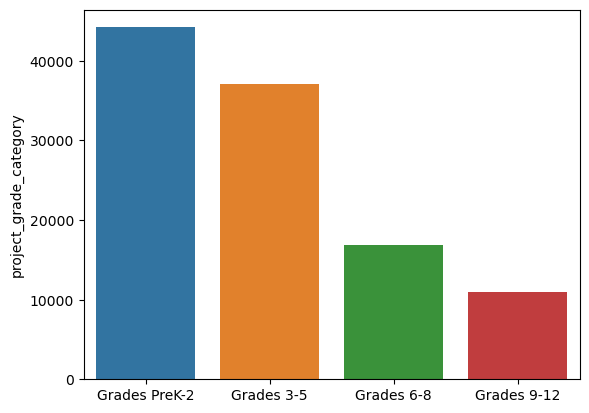

In [407]:
sns.barplot(x=project_data.project_grade_category.value_counts().index,y= project_data.project_grade_category.value_counts());

In [408]:
# Replaces spaces and dashes with underscore, and convert to lower case

project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()

In [409]:
project_data['project_grade_category'].values

array(['grades_prek_2', 'grades_6_8', 'grades_6_8', ..., 'grades_prek_2',
       'grades_3_5', 'grades_6_8'], dtype=object)

## Processing school_state

In [410]:
project_data.school_state.values

array(['IN', 'FL', 'AZ', ..., 'NJ', 'NY', 'VA'], dtype=object)

In [411]:
# Convert all the states into lower case

project_data['school_state'] = project_data['school_state'].str.lower()

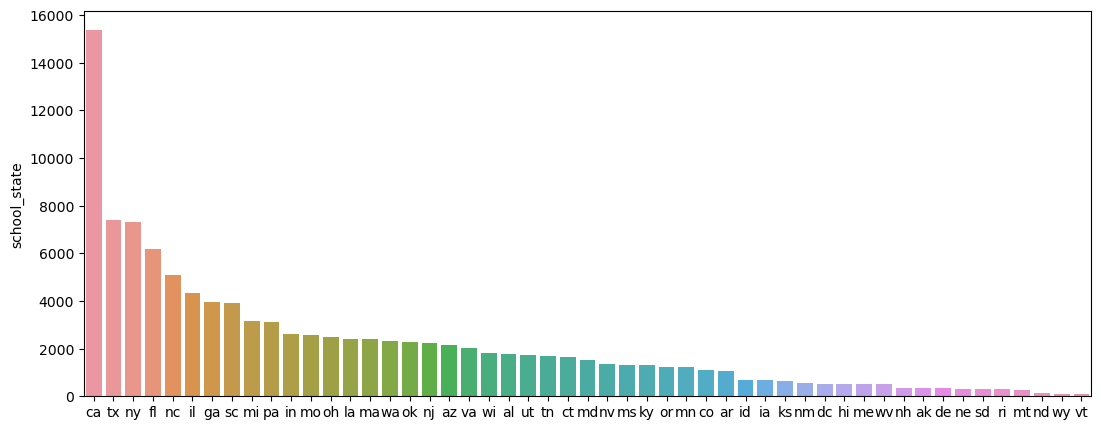

In [412]:
# Visualise the data

plt.figure(figsize=(13,5))
sns.barplot(x=project_data.school_state.value_counts().index,y= project_data.school_state.value_counts());

## Processing project_subject_categories

In [413]:
project_data.project_subject_categories.values

array(['Literacy & Language', 'History & Civics, Health & Sports',
       'Health & Sports', ..., 'Literacy & Language, Math & Science',
       'Health & Sports, Special Needs',
       'Applied Learning, Math & Science'], dtype=object)

In [414]:
# Clean the subject feature

project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()

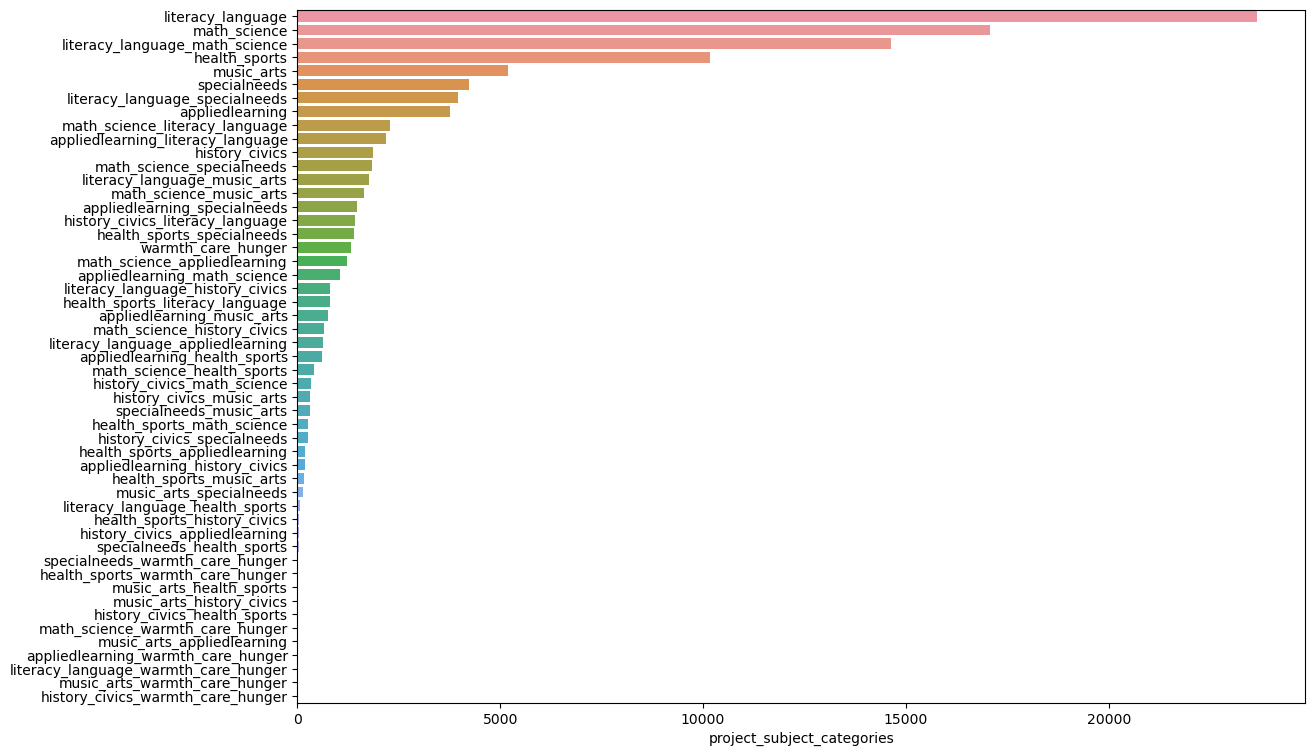

In [415]:
plt.figure(figsize=(13,9))
sns.barplot(y=project_data.project_subject_categories.value_counts().index,x= project_data.project_subject_categories.value_counts());

## Processing project_subject_subcategories

In [416]:
project_data.project_subject_subcategories.values

array(['ESL, Literacy', 'Civics & Government, Team Sports',
       'Health & Wellness, Team Sports', ..., 'Literacy, Mathematics',
       'Health & Wellness, Special Needs',
       'College & Career Prep, Mathematics'], dtype=object)

In [417]:
# Clean the subcategory

project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()


In [418]:
project_data.project_subject_subcategories.value_counts()

literacy                          9486
literacy_mathematics              8324
literature_writing_mathematics    5922
literacy_literature_writing       5571
mathematics                       5379
                                  ... 
communityservice_gym_fitness         1
parentinvolvement_teamsports         1
gym_fitness_socialsciences           1
communityservice_music               1
economics_foreignlanguages           1
Name: project_subject_subcategories, Length: 401, dtype: int64

## Process teacher_number_of_previously_posted_projects

In [419]:
project_data.teacher_number_of_previously_posted_projects.values

array([0, 7, 1, ..., 3, 0, 0], dtype=int64)

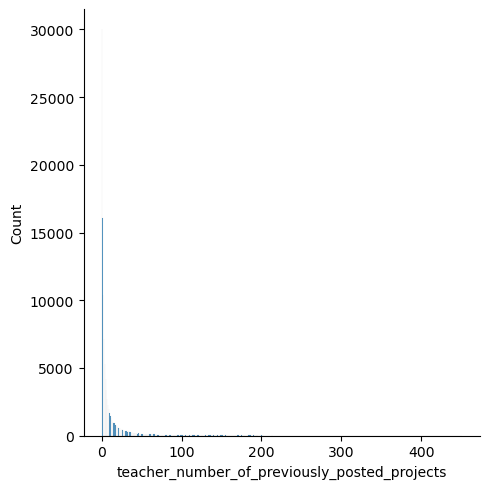

In [420]:
sns.displot(project_data.teacher_number_of_previously_posted_projects)

 ## Processing project title

In [421]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [422]:
def preprocess_text(text_data):
    '''preprocesses the text data, and returns a preprocessed list of text data
       replaces escape characters'''
    
    preprocessed_text = []
   
    for sentance in text_data:
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
       
    
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

preprocessed_titles = preprocess_text(project_data['project_title'].values)

In [423]:
project_data.project_title = preprocessed_titles 

In [424]:
project_data.project_title

0                 educational support english learners home
1                          wanted projector hungry learners
2           soccer equipment awesome middle school students
3                                    techie kindergarteners
4                                    interactive math tools
                                ...                        
109243    privacy shields help promote independent thinking
109244                                 technology classroom
109245                      2016 2017 beginning year basics
109246                 flexible seating inclusive classroom
109247          classroom tech develop 21st century leaders
Name: project_title, Length: 109245, dtype: object

## Preprocessing Data in Resource Data


In [425]:
resource_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [426]:
resource_data.info() # General information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [427]:
resource_data.isnull().sum() # Check for missing values

id               0
description    292
quantity         0
price            0
dtype: int64

We wont use the description feature, hence we will just drop it. 

<AxesSubplot:>

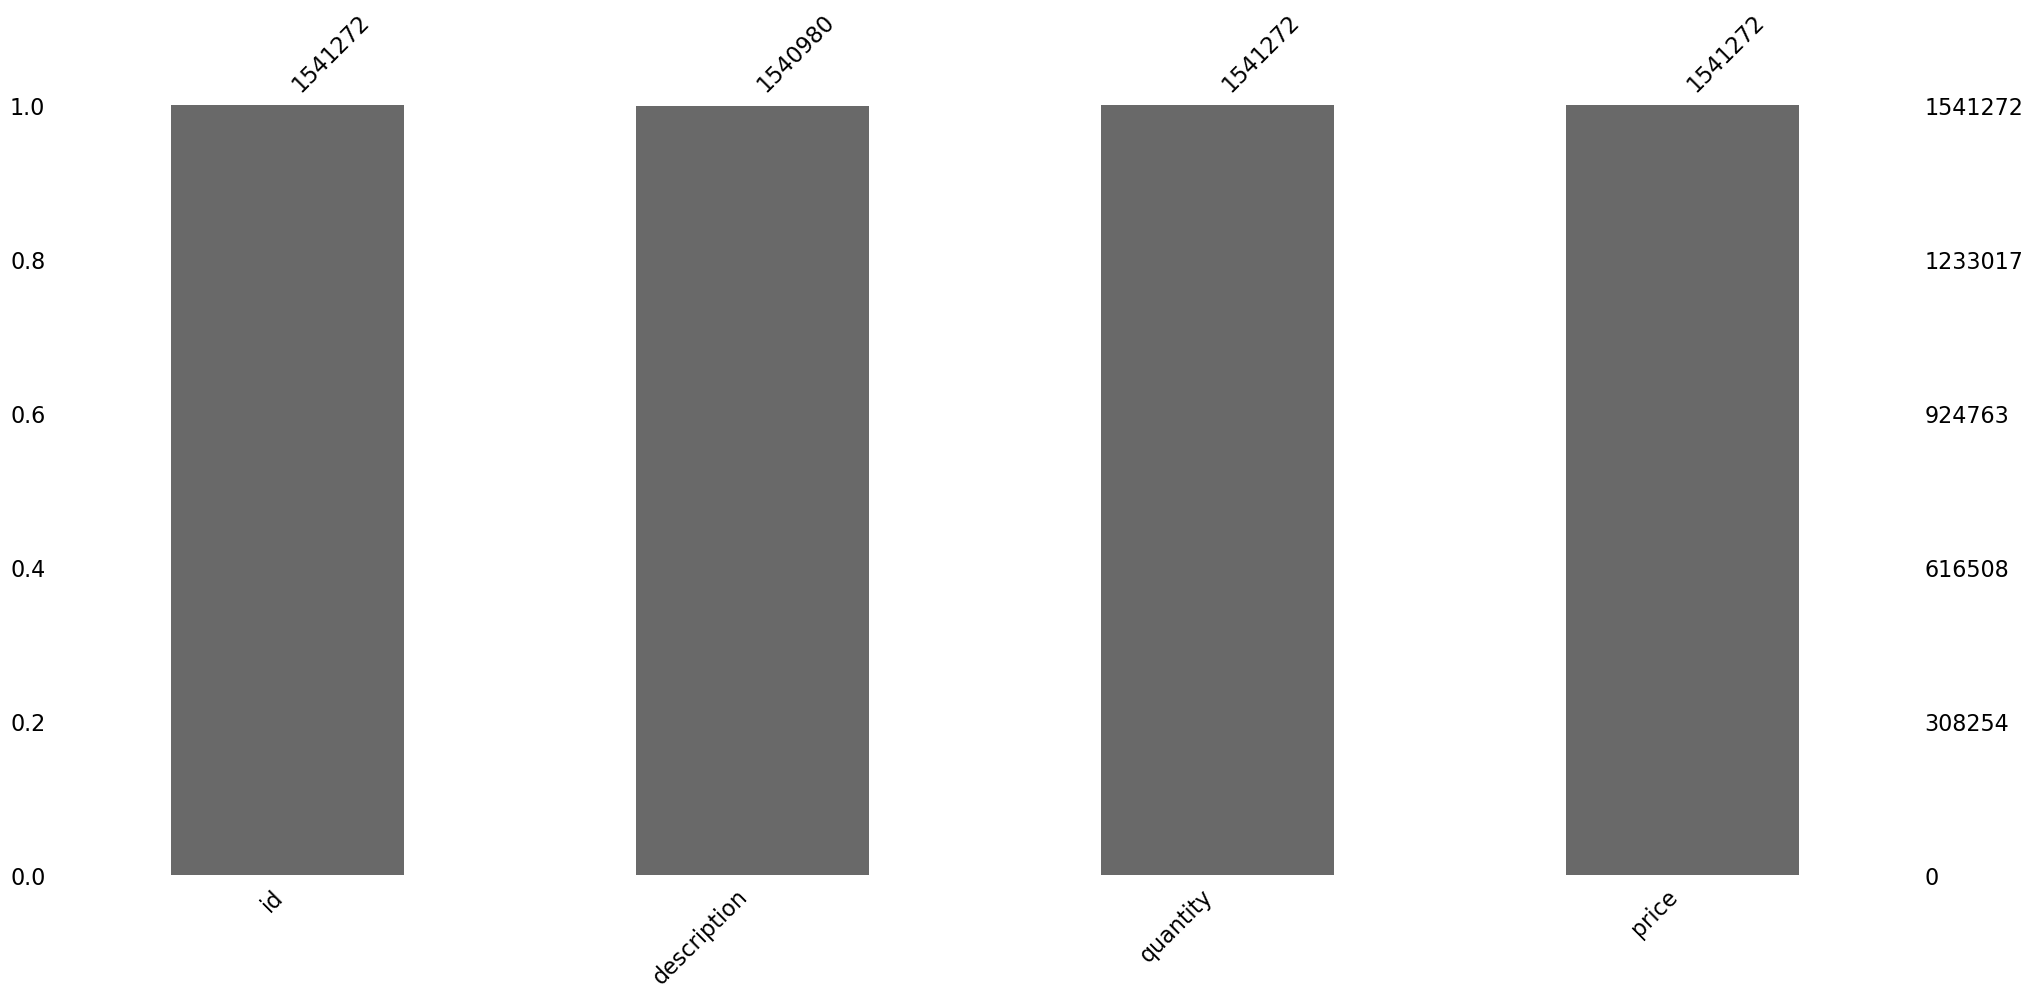

In [428]:
msno.bar(resource_data)

## Processing Price

In [429]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [430]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

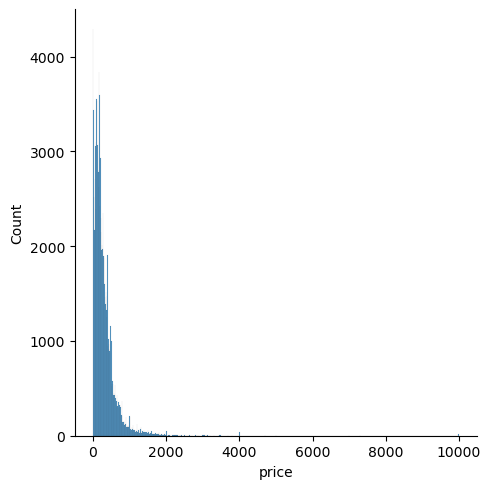

In [431]:
sns.displot(project_data.price);

In [432]:
project_data.head() # Preview

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs.,in,2016-12-05 13:43:57,grades_prek_2,literacy_language,esl_literacy,educational support english learners home,My students need opportunities to practice beg...,0,0,students english learners working english seco...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr.,fl,2016-10-25 09:22:10,grades_6_8,history_civics_health_sports,civics_government_teamsports,wanted projector hungry learners,My students need a projector to help with view...,7,1,students arrive school eager learn polite gene...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,ms.,az,2016-08-31 12:03:56,grades_6_8,health_sports,health_wellness_teamsports,soccer equipment awesome middle school students,"My students need shine guards, athletic socks,...",1,0,true champions not always ones win guts mia ha...,516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,mrs.,ky,2016-10-06 21:16:17,grades_prek_2,literacy_language_math_science,literacy_mathematics,techie kindergarteners,My students need to engage in Reading and Math...,4,1,work unique school filled esl english second l...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,mrs.,tx,2016-07-11 01:10:09,grades_prek_2,math_science,mathematics,interactive math tools,My students need hands on practice in mathemat...,1,1,second grade classroom next year made around 2...,67.98,4


## Removing columns we dont need


In [433]:

project_data.drop(['Unnamed: 0','id','teacher_id','project_submitted_datetime','quantity','project_resource_summary'], axis=1, inplace=True)

In [442]:
# Final data

project_data.head()

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,project_is_approved,essay,price
104773,mrs,ca,grades_prek_2,music_arts,music,instrumental learning music,28,1,pleasure working outstanding children come sch...,179.99
64795,ms,tx,grades_prek_2,health_sports,health_wellness,moving grooving rock learning,1,1,students economically disadvantaged hispanic d...,322.30
31718,ms,fl,grades_prek_2,literacy_language,literature_writing,let get first grade readers track,0,0,school small tight knit family absolutely bles...,181.68
25781,mrs,wi,grades_prek_2,appliedlearning_literacy_language,earlydevelopment_literacy,classroom supplies help learners engage,5,0,stem school focus tailoring instruction meet e...,1048.00
106267,ms,ms,grades_3_5,math_science,appliedsciences_mathematics,robotics stem classroom,1,0,teacher low income school district students fa...,149.98


##  Splitting data into Train and Cross Validation(or test): Stratified Sampling


In [435]:
# Use 10000 rows of data

project_data_copy =project_data.copy()
project_data = project_data_copy.sample(n = 100000)

In [436]:
# Check for shape

project_data.shape

(100000, 10)

In [437]:
# Get your x and y

y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)

# Preview
X.head(1)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,essay,price
104773,mrs.,ca,grades_prek_2,music_arts,music,instrumental learning music,28,pleasure working outstanding children come sch...,179.99


In [511]:
# Split data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify =y,random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

# Vectorizing Text Data

In [439]:
# Import revelant libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Bag of Words on the Essays

In [445]:
# Perform Bag of Words on Essays

vectorizer_essay = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_essay.fit(X_train['essay'].values) # fit has to happen only on train data

X_train_essay_bow = vectorizer_essay.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_essay.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_essay.transform(X_test['essay'].values)


In [446]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(44890, 5000) (44890,)
(22110, 5000) (22110,)
(33000, 5000) (33000,)


### TFIDF on the Essays

In [447]:
# Perform TFIDF
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(X_train.essay.values)


X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_essay_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['essay'].values)


In [448]:
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After vectorizations
(44890, 11643) (44890,)
(22110, 11643) (22110,)
(33000, 11643) (33000,)


### Bag of Words on Titles

In [449]:
# Bag on Titles
vectorizer_title = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_title.fit(X_train['project_title'].values) # fit has to happen only on train data

# Transform
X_train_title_bow = vectorizer_title.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer_title.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer_title.transform(X_test['project_title'].values)


In [450]:
print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)

After vectorizations
(44890, 3163) (44890,)
(22110, 3163) (22110,)
(33000, 3163) (33000,)


### TFIDF on Titles

In [451]:
# Perform TFIDF
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train.project_title.values)

# Transform
X_train_project_title_tfidf = vectorizer_tfidf_title.transform(X_train['project_title'].values)
X_cv_project_title_tfidf = vectorizer_tfidf_title.transform(X_cv['project_title'].values)
X_test_project_title_tfidf = vectorizer_tfidf_title.transform(X_test['project_title'].values)

In [452]:
print("After vectorizations")
print(X_train_project_title_tfidf.shape, y_train.shape)
print(X_cv_project_title_tfidf.shape, y_cv.shape)
print(X_test_project_title_tfidf.shape, y_test.shape)

After vectorizations
(44890, 1894) (44890,)
(22110, 1894) (22110,)
(33000, 1894) (33000,)


# Vectorizing Categorical Data

### Encoding School State

In [453]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)


In [454]:
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names_out())

After vectorizations
(44890, 51) (44890,)
(22110, 51) (22110,)
(33000, 51) (33000,)
['00' '000' '00am' ... 'zx110' 'zydeco' 'zynergy']


### Encoding Teacher Prefixes

In [455]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher.transform(X_test['teacher_prefix'].values)



In [456]:
print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names_out())

After vectorizations
(44890, 5) (44890,)
(22110, 5) (22110,)
(33000, 5) (33000,)
['00' '000' '00am' ... 'zx110' 'zydeco' 'zynergy']


### Encoding Grades

In [459]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)



In [460]:
print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)

After vectorizations
(44890, 4) (44890,)
(22110, 4) (22110,)
(33000, 4) (33000,)


### Encoding Subject Categories

In [518]:

vectorizer_sub = CountVectorizer()
vectorizer_sub.fit(X_train['project_subject_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_subject_categories_ohe = vectorizer_sub.transform(X_train['project_subject_categories'].values)
X_cv_project_subject_categories_ohe = vectorizer_sub.transform(X_cv['project_subject_categories'].values)
X_test_project_subject_categories_ohe = vectorizer_sub.transform(X_test['project_subject_categories'].values)

In [519]:
print("After vectorizations")
print(X_train_project_subject_categories_ohe.shape, y_train.shape)
print(X_cv_project_subject_categories_ohe.shape, y_cv.shape)
print(X_test_project_subject_categories_ohe.shape, y_test.shape)

After vectorizations
(44890, 50) (44890,)
(22110, 50) (22110,)
(33000, 50) (33000,)


### Encoding Subject Subcategories

In [463]:
vectorizer_sub_subcat = CountVectorizer()
vectorizer_sub_subcat.fit(X_train['project_subject_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_subject_subcategories_ohe = vectorizer_sub_subcat.transform(X_train['project_subject_subcategories'].values)
X_cv_project_subject_subcategories_ohe = vectorizer_sub_subcat.transform(X_cv['project_subject_subcategories'].values)
X_test_project_subject_subcategories_ohe = vectorizer_sub_subcat.transform(X_test['project_subject_subcategories'].values)

In [464]:
print("After vectorizations")
print(X_train_project_subject_subcategories_ohe.shape, y_train.shape)
print(X_cv_project_subject_subcategories_ohe.shape, y_cv.shape)
print(X_test_project_subject_subcategories_ohe.shape, y_test.shape)

After vectorizations
(44890, 369) (44890,)
(22110, 369) (22110,)
(33000, 369) (33000,)


# Normalizing Numerical Features

### Normalize the price feature

In [468]:
normalizer_price = Normalizer()
# Convert into a 2D for the normalizer
normalizer_price.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(1,-1).reshape(-1,1))
X_cv_price_norm = normalizer_price.transform(X_cv['price'].values.reshape(1,-1).reshape(-1,1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(1,-1).reshape(-1,1))

In [469]:
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(44890, 1) (44890,)
(22110, 1) (22110,)
(33000, 1) (33000,)


### Normalize the number of posted projects

In [470]:

normalizer_num_proj = Normalizer()
# Convert into a 2D for the normalizer
normalizer_num_proj.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer_num_proj.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer_num_proj.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer_num_proj.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).reshape(-1,1))

In [471]:
print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)

After vectorizations
(44890, 1) (44890,)
(22110, 1) (22110,)
(33000, 1) (33000,)


# Merge all the Features 

### One hot encoded data with Bag of words

In [472]:
#  Use the hcstack function to horizontally stacks sparse matrice(your train,val and test)
# Use the tocsr() function for easy numerical computation

X_tr = hstack((X_train_essay_bow,X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_price_norm,X_train_title_bow,
               X_train_teacher_number_of_previously_posted_projects_norm,
               X_train_project_subject_subcategories_ohe,
               X_train_project_subject_categories_ohe)).tocsr()

X_cv = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,
               X_cv_price_norm,X_cv_title_bow,
               X_cv_teacher_number_of_previously_posted_projects_norm,
               X_cv_project_subject_subcategories_ohe,
               X_cv_project_subject_categories_ohe,)).tocsr()


X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe,
               X_test_grade_ohe, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,
               X_test_project_subject_subcategories_ohe,X_test_project_subject_categories_ohe,
               X_test_title_bow
              )).tocsr()

In [473]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(44890, 8644) (44890,)
(22110, 8644) (22110,)
(33000, 8644) (33000,)


# Applying Naive Bayes

In [475]:
def batch_predict(clf, data):
    '''
    takes a trained classifier (clf) and data as input, 
    and returns a list of predicted probabilities of the positive class for the given data.
    The function is designed to handle large datasets by making predictions in batches of 1000 data points.'''

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
   
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [477]:
#  Performing hyperparameter tuning for a Multinomial Naive Bayes (MNB) model using cross-validation.

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in alphas:
    naive_b = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    naive_b.fit(X_tr, y_train)

    y_train_pred = batch_predict(naive_b, X_tr)    
    y_cv_pred = batch_predict(naive_b, X_cv)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for alpha in (alphas):
    b = math.log(alpha)
    log_alphas.append(b)

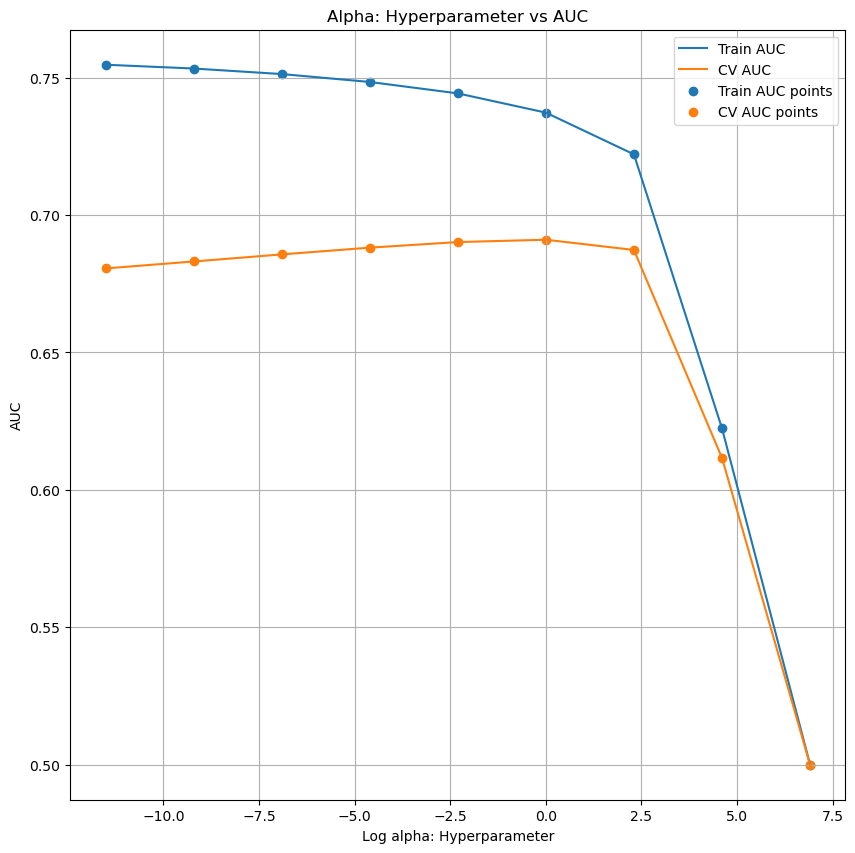

In [479]:
plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log alpha: Hyperparameter")
plt.ylabel("AUC")
plt.title("Alpha: Hyperparameter vs AUC")
plt.grid()
plt.show()

# Grid Search CV

In [480]:
# Performs hyperparameter tuning using grid search cross-validation for a Multinomial Naive Bayes model

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

# retrieving the mean train score, standard deviation of the train score,
# mean test score, and standard deviation of the test score

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

best_alpha_bow = clf.best_params_['alpha']

print("BEST ALPHA: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .....................................

[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
BEST ALPHA:  0.8  BEST SCORE:  0.6876297129249351


In [481]:

print("BEST ALPHA: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

BEST ALPHA:  0.8  BEST SCORE:  0.6876297129249351


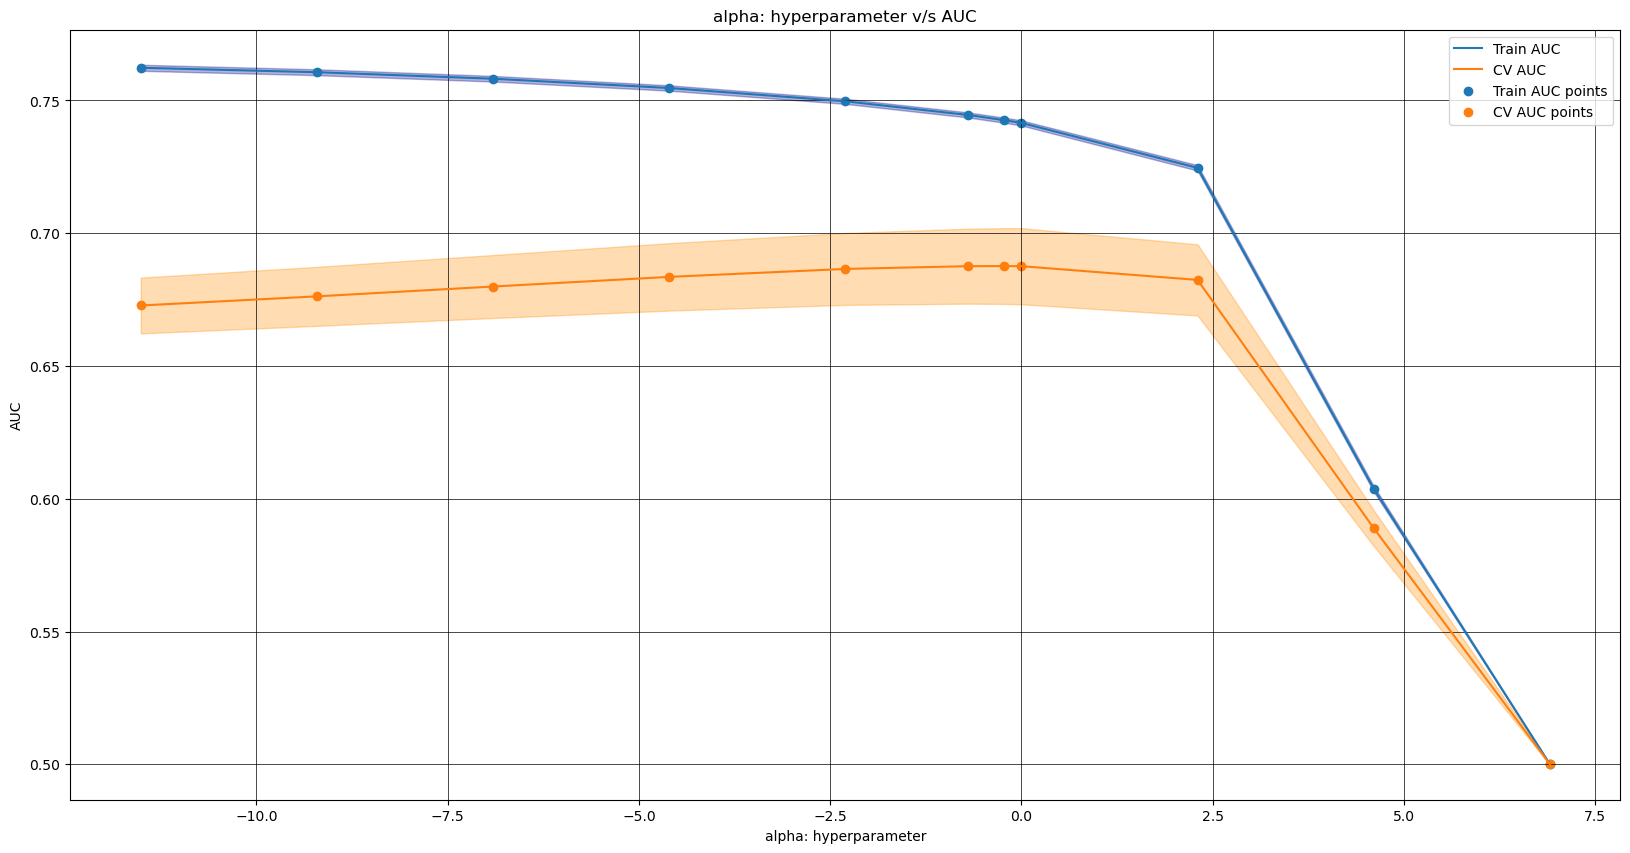

In [482]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
log_alphas =[]

for a in (alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Use the best parameter to build the model

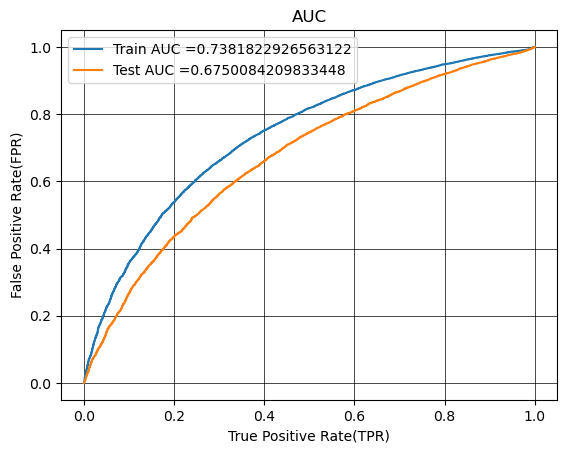

In [483]:
# Using the best parameter to build a model 

best_alpha = clf.best_params_['alpha']

from sklearn.metrics import roc_curve, auc

nb_bow = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])

nb_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, X_tr)    
y_test_pred = batch_predict(nb_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_set1_train = auc(train_fpr, train_tpr)
auc_set1_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Confusion Matrix

In [484]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if  fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### On Train

In [485]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Print out the confusion matrix on the train data
cm =  confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

the maximum value of tpr*(1-fpr) 0.24999997829717183 for threshold 0.034


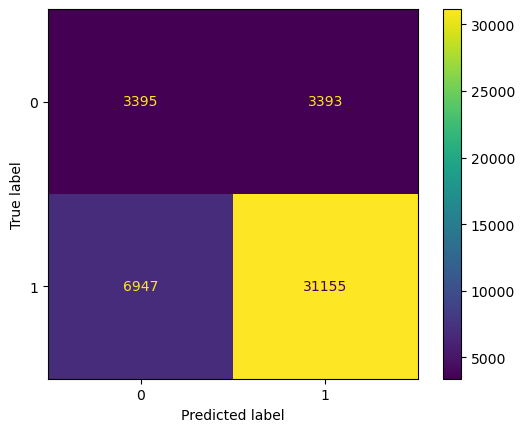

In [486]:
disp.plot()

### On Test

In [487]:
# Print out the confusion matrix on test set

cm2 = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.32


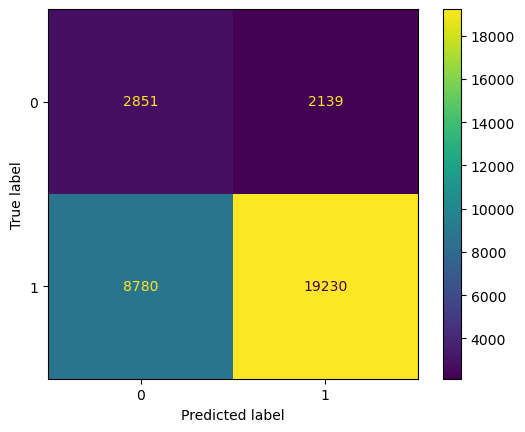

In [488]:
disp2.plot()

### One hot encoded data with TFIDF


In [507]:
# Merge all one hot encorded data with TFIDF

X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_price_norm,
               X_train_teacher_number_of_previously_posted_projects_norm,
               X_train_project_subject_subcategories_ohe,X_train_essay_tfidf,
               X_train_project_title_tfidf,
               X_train_project_subject_categories_ohe)).tocsr()

# cross val
X_cv = hstack(( X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,
               X_cv_price_norm,X_cv_essay_tfidf,
               X_cv_teacher_number_of_previously_posted_projects_norm,
               X_cv_project_subject_subcategories_ohe,X_cv_project_title_tfidf,
               X_cv_project_subject_categories_ohe,)).tocsr()

# Test set
X_te = hstack(( X_test_state_ohe, X_test_teacher_ohe,
               X_test_grade_ohe, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,
               X_test_project_subject_subcategories_ohe,X_test_project_subject_categories_ohe,
               X_test_essay_tfidf,X_test_project_title_tfidf
              )).tocsr()

In [508]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(44890, 14018) (44890,)
(22110, 14018) (22110,)
(33000, 14018) (33000,)


In [493]:
train_auc = []
cv_auc = []
log_alphas =[]

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]

for i in alphas:
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_tr, y_train)

    y_train_pred = batch_predict(nb, X_tr)    
    y_cv_pred = batch_predict(nb, X_cv)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in alphas:
    b = math.log(a)
    log_alphas.append(b)

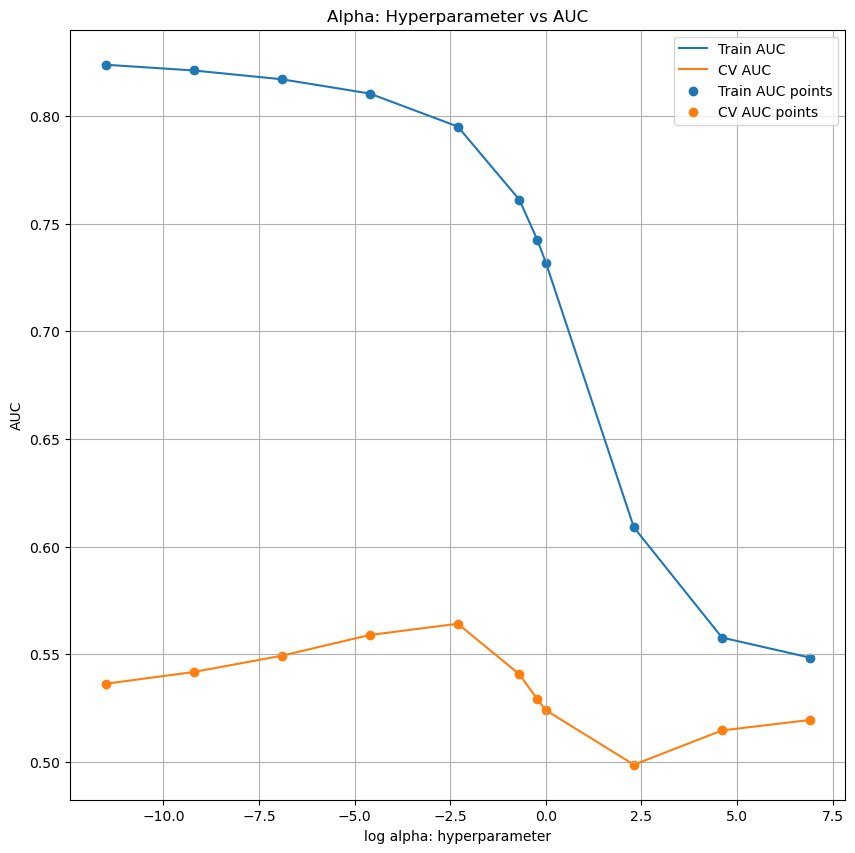

In [494]:
plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Alpha: Hyperparameter vs AUC")
plt.grid()
plt.show()

# Grid Search CV

In [495]:
# Perform hyperparameter tuning using grid search cross-validation for a Multinomial Naive Bayes model.

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

best_alpha_tfidf = clf.best_params_['alpha']

print("BEST ALPHA: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .....................................

[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
BEST ALPHA:  0.1  BEST SCORE:  0.6624948409282723


In [496]:
print("BEST ALPHA: ",clf.best_params_['alpha']," BEST SCORE: ",clf.best_score_)

BEST ALPHA:  0.1  BEST SCORE:  0.6624948409282723


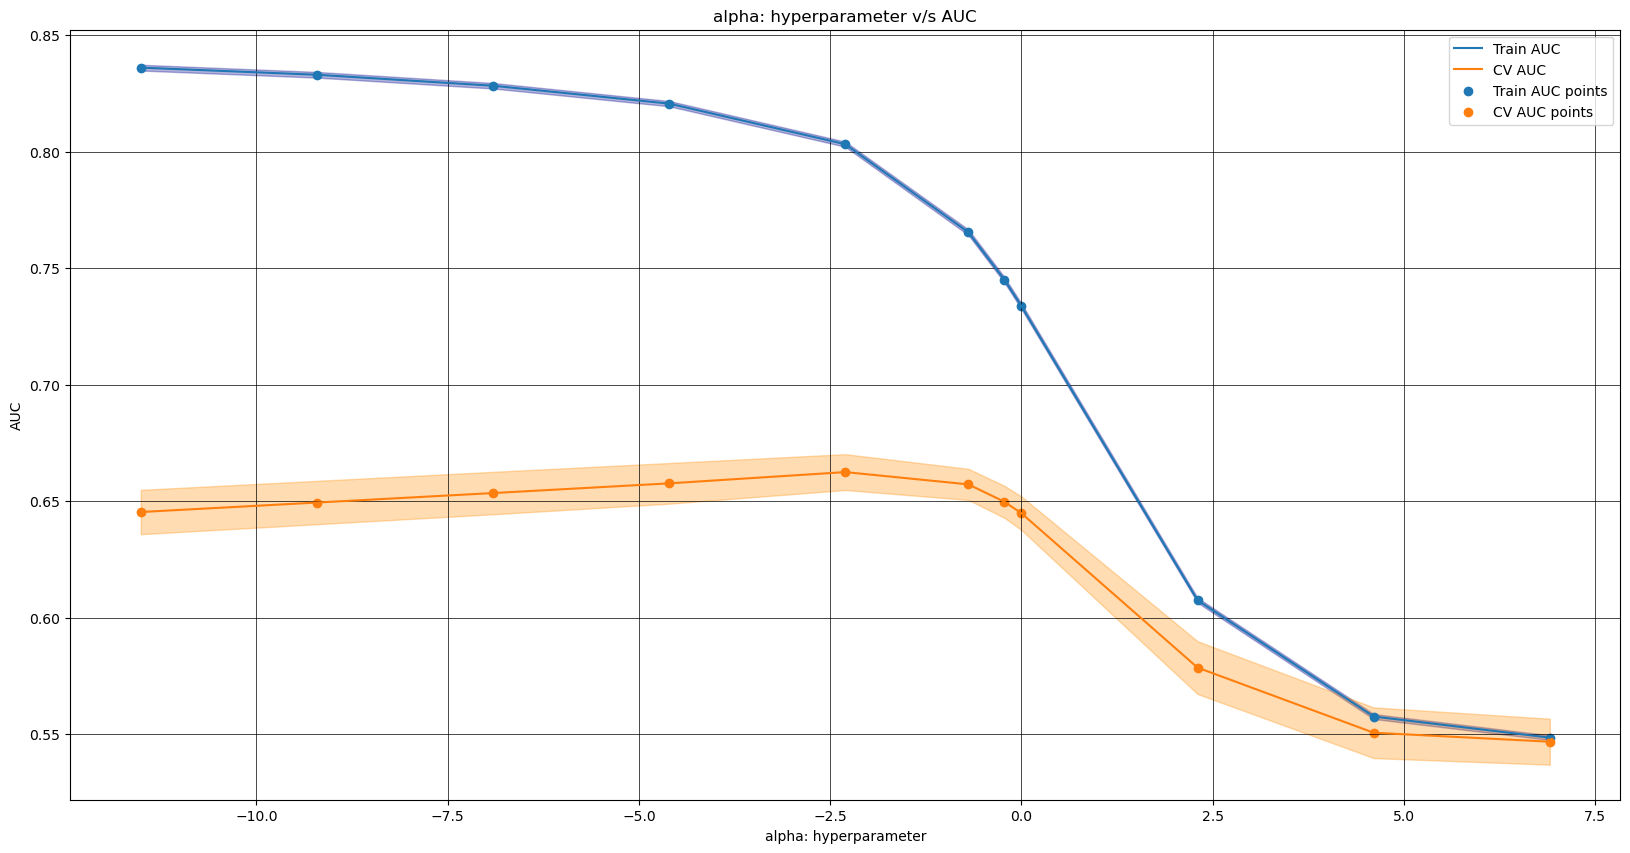

In [497]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
log_alphas =[]

for a in (alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Use the best parameter to build the model

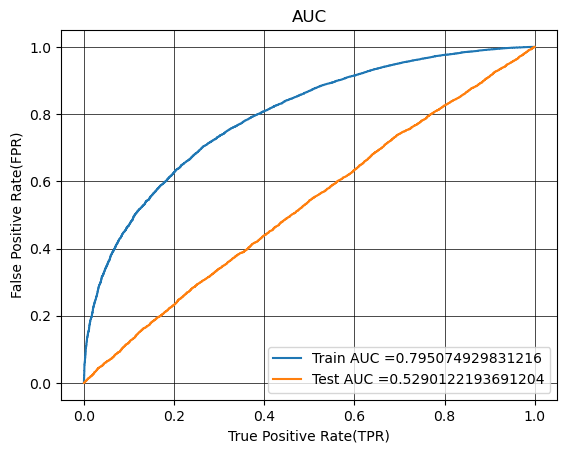

In [498]:
best_alpha = clf.best_params_['alpha']


from sklearn.metrics import roc_curve, auc

nb_tfidf = MultinomialNB(alpha = best_alpha,class_prior=[0.5,0.5])

nb_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_tfidf, X_tr)    
y_test_pred = batch_predict(nb_tfidf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_set2_train = auc(train_fpr, train_tpr)
auc_set2_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Confusion Matrix

In [499]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Print out the confusion matrix on the train data

cm_ =  confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
disp_ = ConfusionMatrixDisplay(confusion_matrix=cm_)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.347


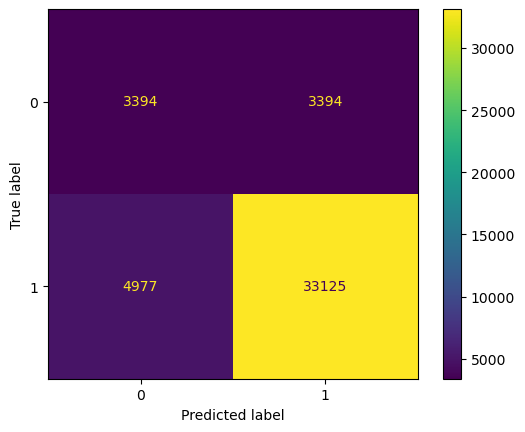

In [500]:
disp_.plot()

### On Test

In [501]:
# Print out the confusion matrix on test set

cm2 = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.44


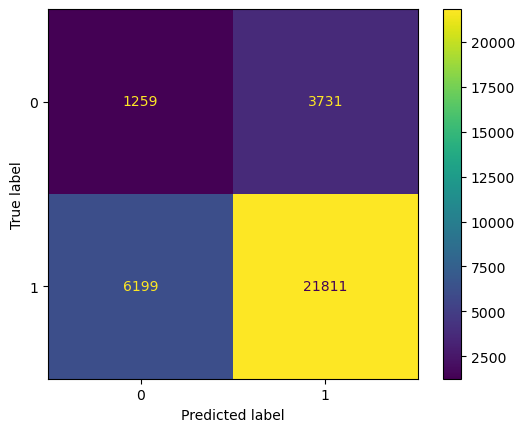

In [502]:
disp2.plot()

# Top 10 Features from Bag of Words

In [520]:
# Merged set on Bag of words and OHE data

X_tr_ = hstack((X_train_essay_bow,X_train_state_ohe, X_train_teacher_ohe, 
               X_train_grade_ohe, X_train_price_norm,X_train_title_bow,
               X_train_teacher_number_of_previously_posted_projects_norm,
               X_train_project_subject_subcategories_ohe,
               X_train_project_subject_categories_ohe)).tocsr()

X_cv_ = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,
               X_cv_price_norm,X_cv_title_bow,
               X_cv_teacher_number_of_previously_posted_projects_norm,
               X_cv_project_subject_subcategories_ohe,
               X_cv_project_subject_categories_ohe,)).tocsr()


X_te_ = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe,
               X_test_grade_ohe, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,
               X_test_project_subject_subcategories_ohe,X_test_project_subject_categories_ohe,
               X_test_title_bow
              )).tocsr()

In [528]:
# initialize a classifer

nb_bow = MultinomialNB(alpha = best_alpha_bow,class_prior=[0.5,0.5])

nb_bow.fit(X_tr_, y_train)

MultinomialNB(alpha=0.8, class_prior=[0.5, 0.5])

In [542]:
# Get all the features names for encoded features(BOW)

bow_features_names = []
for ct1 in vectorizer_sub_cat.get_feature_names_out() :
    bow_features_names.append(ct1)

for ct2 in vectorizer_sub.get_feature_names_out() :
    bow_features_names.append(ct2)

for ct3 in vectorizer_state.get_feature_names_out() :
    bow_features_names.append(ct3)


for ct4 in vectorizer_grade.get_feature_names_out() :
    bow_features_names.append(ct4)


for ct5 in vectorizer_teacher.get_feature_names_out() :
    bow_features_names.append(ct5)

for ct6 in vectorizer_title.get_feature_names_out() :
    bow_features_names.append(ct6)   


for ct7 in vectorizer_essay_tfidf.get_feature_names_out() :
    bow_features_names.append(ct7)  





In [543]:
# Get all the negative prob features

bow_features_probs_neg = {}

for a in range(len(bow_features_names)) :
    bow_features_probs_neg[a] = nb_bow.feature_log_prob_[0,a]

### Negative Features

In [544]:
final_bow_features_neg = pd.DataFrame({'feature_prob_estimates' : list(bow_features_probs_neg.values()),
'feature_names' : list(bow_features_names)})

In [545]:
negative_feature_df = final_bow_features_neg.sort_values(by = ['feature_prob_estimates'], ascending = False)

In [546]:
# Top negative features
negative_feature_df.head(10)

,feature_prob_estimates,feature_names
4111,-3.183174,come different
3673,-4.265984,athletes
2372,-4.608148,printer
690,-4.758951,cold
2978,-4.929264,teachers
2317,-4.954494,planet
1936,-4.994168,making learning
5060,-5.101871,future
2876,-5.150000,student centered classroom
2662,-5.178534,sensational sensory


In [547]:
## Get all the positives features and return as data frame

bow_features_probs_pos = {}
for a in range(len(bow_features_names)) :

    bow_features_probs_pos[a] = nb_bow.feature_log_prob_[1,a]

final_bow_features_pos = pd.DataFrame({'feature_prob_estimates' : list(bow_features_probs_pos.values()),
'feature_names' : list(bow_features_names)})

positive_df = final_bow_features_pos.sort_values(by = ['feature_prob_estimates'], ascending = False)


positive_df.head(10)

,feature_prob_estimates,feature_names
4111,-3.158848,come different
3673,-4.306114,athletes
2372,-4.670408,printer
690,-4.695488,cold
2978,-4.969208,teachers
2317,-5.008063,planet
1936,-5.037695,making learning
5060,-5.148341,future
2662,-5.174990,sensational sensory
2876,-5.193461,student centered classroom


# FINAL RESULTS

In [548]:
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Hyperparameter: Alpha", "Train AUC", "Test AUC"]
auc_set2_train=auc(train_fpr, train_tpr)
auc_set2_test=auc(test_fpr, test_tpr)

table.add_row(["BOW", "Multinomial Naive Bayes",best_alpha_bow, round(auc_set1_train,2),round(auc_set1_test,2)])
table.add_row(["TF-IDF", "Multinomial Naive Bayes", best_alpha_tfidf, round(auc_set2_train,2),round(auc_set2_test,2)])

table

Vectorizer,Model,Hyperparameter: Alpha,Train AUC,Test AUC
BOW,Multinomial Naive Bayes,0.8,0.74,0.68
TF-IDF,Multinomial Naive Bayes,0.1,0.8,0.53
